In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

# 历史天气部分

## 将经纬度找到指定的county

In [2]:
historical_weather = pd.read_csv("../data/historical_weather.csv",parse_dates=['datetime'])
historical_weather

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1
1,2021-09-01 00:00:00,14.0,12.0,0.0,0.0,1010.6,7,8,0,0,4.944444,353,0.0,0.0,0.0,57.6,22.2,1
2,2021-09-01 00:00:00,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,57.6,22.7,1
3,2021-09-01 00:00:00,15.4,13.0,0.0,0.0,1014.4,4,2,4,0,7.111111,349,0.0,0.0,0.0,57.6,23.2,1
4,2021-09-01 00:00:00,15.9,12.6,0.0,0.0,1013.8,12,7,0,20,8.388889,360,0.0,0.0,0.0,57.6,23.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710795,2023-05-30 10:00:00,10.8,4.1,0.4,0.0,1018.7,40,0,67,0,1.333333,283,440.0,264.0,176.0,59.7,26.2,637
1710796,2023-05-30 10:00:00,11.4,2.9,0.3,0.0,1018.8,41,0,69,0,1.527778,302,453.0,283.0,170.0,59.7,26.7,637
1710797,2023-05-30 10:00:00,9.5,3.2,0.1,0.0,1018.9,47,0,79,0,3.416667,302,477.0,312.0,165.0,59.7,27.2,637
1710798,2023-05-30 10:00:00,11.0,1.6,0.0,0.0,1018.6,31,0,52,0,3.472222,309,535.0,400.0,135.0,59.7,27.7,637


In [3]:
historical_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710800 entries, 0 to 1710799
Data columns (total 18 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   datetime                datetime64[ns]
 1   temperature             float64       
 2   dewpoint                float64       
 3   rain                    float64       
 4   snowfall                float64       
 5   surface_pressure        float64       
 6   cloudcover_total        int64         
 7   cloudcover_low          int64         
 8   cloudcover_mid          int64         
 9   cloudcover_high         int64         
 10  windspeed_10m           float64       
 11  winddirection_10m       int64         
 12  shortwave_radiation     float64       
 13  direct_solar_radiation  float64       
 14  diffuse_radiation       float64       
 15  latitude                float64       
 16  longitude               float64       
 17  data_block_id           int64         
dtypes:

In [4]:
historical_weather['year'] = historical_weather['datetime'].apply(lambda x: x.year)
historical_weather['month'] = historical_weather['datetime'].apply(lambda x: x.month)
historical_weather['day'] = historical_weather['datetime'].apply(lambda x: x.day)
historical_weather['hour'] = historical_weather['datetime'].apply(lambda x: x.hour)
historical_weather

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id,year,month,day,hour
0,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1,2021,9,1,0
1,2021-09-01 00:00:00,14.0,12.0,0.0,0.0,1010.6,7,8,0,0,4.944444,353,0.0,0.0,0.0,57.6,22.2,1,2021,9,1,0
2,2021-09-01 00:00:00,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,57.6,22.7,1,2021,9,1,0
3,2021-09-01 00:00:00,15.4,13.0,0.0,0.0,1014.4,4,2,4,0,7.111111,349,0.0,0.0,0.0,57.6,23.2,1,2021,9,1,0
4,2021-09-01 00:00:00,15.9,12.6,0.0,0.0,1013.8,12,7,0,20,8.388889,360,0.0,0.0,0.0,57.6,23.7,1,2021,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710795,2023-05-30 10:00:00,10.8,4.1,0.4,0.0,1018.7,40,0,67,0,1.333333,283,440.0,264.0,176.0,59.7,26.2,637,2023,5,30,10
1710796,2023-05-30 10:00:00,11.4,2.9,0.3,0.0,1018.8,41,0,69,0,1.527778,302,453.0,283.0,170.0,59.7,26.7,637,2023,5,30,10
1710797,2023-05-30 10:00:00,9.5,3.2,0.1,0.0,1018.9,47,0,79,0,3.416667,302,477.0,312.0,165.0,59.7,27.2,637,2023,5,30,10
1710798,2023-05-30 10:00:00,11.0,1.6,0.0,0.0,1018.6,31,0,52,0,3.472222,309,535.0,400.0,135.0,59.7,27.7,637,2023,5,30,10


In [5]:
historical_weather['latitude'] = historical_weather['latitude'].astype(float).round(1)
historical_weather['longitude'] = historical_weather['longitude'].astype(float).round(1)
historical_weather

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id,year,month,day,hour
0,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1,2021,9,1,0
1,2021-09-01 00:00:00,14.0,12.0,0.0,0.0,1010.6,7,8,0,0,4.944444,353,0.0,0.0,0.0,57.6,22.2,1,2021,9,1,0
2,2021-09-01 00:00:00,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,57.6,22.7,1,2021,9,1,0
3,2021-09-01 00:00:00,15.4,13.0,0.0,0.0,1014.4,4,2,4,0,7.111111,349,0.0,0.0,0.0,57.6,23.2,1,2021,9,1,0
4,2021-09-01 00:00:00,15.9,12.6,0.0,0.0,1013.8,12,7,0,20,8.388889,360,0.0,0.0,0.0,57.6,23.7,1,2021,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710795,2023-05-30 10:00:00,10.8,4.1,0.4,0.0,1018.7,40,0,67,0,1.333333,283,440.0,264.0,176.0,59.7,26.2,637,2023,5,30,10
1710796,2023-05-30 10:00:00,11.4,2.9,0.3,0.0,1018.8,41,0,69,0,1.527778,302,453.0,283.0,170.0,59.7,26.7,637,2023,5,30,10
1710797,2023-05-30 10:00:00,9.5,3.2,0.1,0.0,1018.9,47,0,79,0,3.416667,302,477.0,312.0,165.0,59.7,27.2,637,2023,5,30,10
1710798,2023-05-30 10:00:00,11.0,1.6,0.0,0.0,1018.6,31,0,52,0,3.472222,309,535.0,400.0,135.0,59.7,27.7,637,2023,5,30,10


In [6]:
weather_to_county = pd.read_csv("../data/weather_station_to_county_mapping.csv")
weather_to_county

,county_name,longitude,latitude,county
0,NaN,21.7,57.6,NaN
1,NaN,21.7,57.9,NaN
2,NaN,21.7,58.2,NaN
3,NaN,21.7,58.5,NaN
4,NaN,21.7,58.8,NaN
...,...,...,...,...
107,NaN,28.2,58.5,NaN
108,NaN,28.2,58.8,NaN
109,NaN,28.2,59.1,NaN
110,NaN,28.2,59.4,NaN


In [7]:
historical_weather.groupby(by=["longitude","latitude"])["data_block_id"].describe().unstack()


count                                                        \
latitude      57.6     57.9     58.2     58.5     58.8     59.1     59.4   
longitude                                                                  
21.7       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
22.2       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
22.7       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
23.2       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
23.7       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
24.2       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
24.7       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
25.2       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
25.7       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
26.2       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
26.7       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
27.2       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
27.7       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   
28.2       15275.0  15275.0  15275.0  15275.0  15275.0  15275.0  15275.0   

                          mean                                      \
latitude      59.7        57.6        57.9        58.2        58.5   
longitude                                                            
21.7       15275.0  319.270638  319.270638  319.270638  319.270638   
22.2       15275.0  319.270638  319.270638  319.270638  319.270638   
22.7       15275.0  319.270638  319.270638  319.270638  319.270638   
23.2       15275.0  319.270638  319.270638  319.270638  319.270638   
23.7       15275.0  319.270638  319.270638  319.270638  319.270638   
24.2       15275.0  319.270638  319.270638  319.270638  319.270638   
24.7       15275.0  319.270638  319.270638  319.270638  319.270638   
25.2       15275.0  319.270638  319.270638  319.270638  319.270638   
25.7       15275.0  319.270638  319.270638  319.270638  319.270638   
26.2       15275.0  319.270638  319.270638  319.270638  319.270638   
26.7       15275.0  319.270638  319.270638  319.270638  319.270638   
27.2       15275.0  319.270638  319.270638  319.270638  319.270638   
27.7       15275.0  319.270638  319.270638  319.270638  319.270638   
28.2       15275.0  319.270638  319.270638  319.270638  319.270638   

                                                                 std  \
latitude         58.8        59.1        59.4        59.7       57.6   
longitude                                                              
21.7       319.270638  319.270638  319.270638  319.270638  183.73582   
22.2       319.270638  319.270638  319.270638  319.270638  183.73582   
22.7       319.270638  319.270638  319.270638  319.270638  183.73582   
23.2       319.270638  319.270638  319.270638  319.270638  183.73582   
23.7       319.270638  319.270638  319.270638  319.270638  183.73582   
24.2       319.270638  319.270638  319.270638  319.270638  183.73582   
24.7       319.270638  319.270638  319.270638  319.270638  183.73582   
25.2       319.270638  319.270638  319.270638  319.270638  183.73582   
25.7       319.270638  319.270638  319.270638  319.270638  183.73582   
26.2       319.270638  319.270638  319.270638  319.270638  183.73582   
26.7       319.270638  319.270638  319.270638  319.270638  183.73582   
27.2       319.270638  319.270638  319.270638  319.270638  183.73582   
27.7       319.270638  319.270638  319.270638  319.270638  183.73582   
28.2       319.270638  319.270638  319.270638  319.270638  183.73582   

                                                                             \
latitude        57.9       58.2       58.5       58.8       59.1       59.4   
longitude                                                                     
21.7       183.73582  183.73582  183.73582  183.73582  183.73582  1

In [8]:
weather_to_county.groupby(by=["longitude","latitude"])["county"].describe().unstack().count()

       latitude
count  57.6        14
       57.9        14
       58.2        14
       58.5        14
       58.8        14
                   ..
max    58.5        11
       58.8         8
       59.1         9
       59.4         8
       59.7         0
Length: 64, dtype: int64

In [9]:
location = pd.read_csv("../data/county_lon_lats.csv").drop(columns = ["Unnamed: 0"])

# Convert to int to avoid float imprecision
for k in ['latitude', 'longitude'] :
    location[k] = (10*location[k]).astype(int)

location

,county,longitude,latitude
0,0,242,591
1,0,252,591
2,0,237,594
3,0,242,594
4,0,247,594
...,...,...,...
70,15,267,576
71,15,272,576
72,15,267,579
73,15,272,579


In [10]:
def process_weather_info(h, location=location) :

    # Drop duplicates
    h = h.drop_duplicates().reset_index(drop=True)

    # Convert to int to avoid float imprecision
    for k in ['latitude', 'longitude'] :
        h[k] = (10*h[k]).astype(int)

    # Add location
    h = pd.merge(h, location, how='left', on=['latitude', 'longitude'])

    # Fill NaN and force int
    h['county'] = h['county'].fillna(-1).astype(int)

    # Return
    return h

In [11]:
historical_weather = process_weather_info(historical_weather)
historical_weather
#成功将经纬度找到county

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id,year,month,day,hour,county
0,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,576,217,1,2021,9,1,0,-1
1,2021-09-01 00:00:00,14.0,12.0,0.0,0.0,1010.6,7,8,0,0,4.944444,353,0.0,0.0,0.0,576,222,1,2021,9,1,0,-1
2,2021-09-01 00:00:00,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,576,227,1,2021,9,1,0,-1
3,2021-09-01 00:00:00,15.4,13.0,0.0,0.0,1014.4,4,2,4,0,7.111111,349,0.0,0.0,0.0,576,232,1,2021,9,1,0,10
4,2021-09-01 00:00:00,15.9,12.6,0.0,0.0,1013.8,12,7,0,20,8.388889,360,0.0,0.0,0.0,576,237,1,2021,9,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710795,2023-05-30 10:00:00,10.8,4.1,0.4,0.0,1018.7,40,0,67,0,1.333333,283,440.0,264.0,176.0,597,262,637,2023,5,30,10,5
1710796,2023-05-30 10:00:00,11.4,2.9,0.3,0.0,1018.8,41,0,69,0,1.527778,302,453.0,283.0,170.0,597,267,637,2023,5,30,10,5
1710797,2023-05-30 10:00:00,9.5,3.2,0.1,0.0,1018.9,47,0,79,0,3.416667,302,477.0,312.0,165.0,597,272,637,2023,5,30,10,-1
1710798,2023-05-30 10:00:00,11.0,1.6,0.0,0.0,1018.6,31,0,52,0,3.472222,309,535.0,400.0,135.0,597,277,637,2023,5,30,10,-1


保存成新的csv，成功后就不运行了

In [12]:
# historical_weather.to_csv('../data/historical_weather_New.csv')

In [13]:
historical_weather = historical_weather.drop_duplicates(['data_block_id','county'])

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
train = pd.read_csv("../data/train.csv",parse_dates=['datetime'])
train['county'] = train['county'].astype(int)
train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60


In [16]:
train['year'] = train['datetime'].apply(lambda x: x.year)
train['month'] = train['datetime'].apply(lambda x: x.month)
train['day'] = train['datetime'].apply(lambda x: x.day)
train['hour'] = train['datetime'].apply(lambda x: x.hour)
train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,month,day,hour
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021,9,1,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021,9,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021,9,1,0
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021,9,1,0
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,2023,5,31,23
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,2023,5,31,23
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,2023,5,31,23
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,2023,5,31,23


In [17]:
train_new= train[['county', 'data_block_id', 'target','is_consumption','is_business','product_type','hour']]
train_new_is_consumption = train_new[train_new['is_consumption']==1]
train_new_is_consumption

,county,data_block_id,target,is_consumption,is_business,product_type,hour
1,0,0,96.590,1,0,1,0
3,0,0,17.314,1,0,2,0
5,0,0,656.859,1,0,3,0
7,0,0,59.000,1,1,0,0
9,0,0,501.760,1,1,1,0
...,...,...,...,...,...,...,...
2018343,15,637,42.401,1,0,1,23
2018345,15,637,117.332,1,0,3,23
2018347,15,637,197.233,1,1,0,23
2018349,15,637,28.404,1,1,1,23


In [18]:
train_group_by = train.groupby('county')['target'].describe()
train_group_by

,count,mean,std,min,25%,50%,75%,max
county,,,,,,,,
0,212872.0,941.325522,2212.134626,0.0,0.73200,52.0210,685.05800,15480.274
1,91848.0,38.133914,56.566706,0.0,0.34400,13.6690,59.01725,436.720
2,115170.0,129.888047,343.995260,0.0,0.13500,20.5190,75.18400,3036.604
3,122464.0,162.450176,315.471636,0.0,0.32175,30.5930,108.20225,1866.010
4,147226.0,147.658768,250.709334,0.0,0.02525,22.4740,159.04475,1512.696
5,151592.0,231.044165,399.949721,0.0,0.65800,57.8050,217.46700,2489.182
6,30616.0,92.219639,117.457851,0.0,0.00400,48.3420,147.21550,983.878
7,173042.0,205.114767,315.637695,0.0,0.34600,48.1795,286.48875,3938.318
8,91848.0,88.359405,156.282531,0.0,0.05500,20.1920,107.16775,2247.461


In [19]:
merged_is_consumption = pd.merge(train_new_is_consumption, historical_weather,how='left', on=['data_block_id', 'county','hour'])

In [20]:
merged_is_consumption

,county,data_block_id,target,is_consumption,is_business,product_type,hour,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,year,month,day
0,0,0,96.590,1,0,1,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,17.314,1,0,2,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,656.859,1,0,3,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,59.000,1,1,0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,501.760,1,1,1,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009171,15,637,42.401,1,0,1,23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009172,15,637,117.332,1,0,3,23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009173,15,637,197.233,1,1,0,23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009174,15,637,28.404,1,1,1,23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
train_new_no_consumption = train_new[train_new['is_consumption']==0]

In [22]:
merged_no_consumption  = pd.merge(train_new_no_consumption, historical_weather,how='left', on=['data_block_id', 'county','hour'])

In [23]:
merged_no_consumption

,county,data_block_id,target,is_consumption,is_business,product_type,hour,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,year,month,day
0,0,0,0.713,0,0,1,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0.000,0,0,2,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,2.904,0,0,3,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0.000,0,1,0,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0.000,0,1,1,0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009171,15,637,0.004,0,0,1,23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009172,15,637,2.287,0,0,3,23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009173,15,637,0.000,0,1,0,23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009174,15,637,0.000,0,1,1,23,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
merged_is_consumption = merged_is_consumption .dropna()
merged_no_consumption = merged_no_consumption .dropna()
merged_no_consumption
merged_is_consumption

,county,data_block_id,target,is_consumption,is_business,product_type,hour,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,year,month,day
1464,0,1,109.366,1,0,1,0,2021-09-01 00:00:00,13.4,11.0,0.0,0.0,1009.2,38.0,42.0,0.0,0.0,3.500000,336.0,0.0,0.0,0.0,591.0,242.0,2021.0,9.0,1.0
1465,0,1,21.008,1,0,2,0,2021-09-01 00:00:00,13.4,11.0,0.0,0.0,1009.2,38.0,42.0,0.0,0.0,3.500000,336.0,0.0,0.0,0.0,591.0,242.0,2021.0,9.0,1.0
1466,0,1,735.696,1,0,3,0,2021-09-01 00:00:00,13.4,11.0,0.0,0.0,1009.2,38.0,42.0,0.0,0.0,3.500000,336.0,0.0,0.0,0.0,591.0,242.0,2021.0,9.0,1.0
1467,0,1,75.800,1,1,0,0,2021-09-01 00:00:00,13.4,11.0,0.0,0.0,1009.2,38.0,42.0,0.0,0.0,3.500000,336.0,0.0,0.0,0.0,591.0,242.0,2021.0,9.0,1.0
1468,0,1,502.241,1,1,1,0,2021-09-01 00:00:00,13.4,11.0,0.0,0.0,1009.2,38.0,42.0,0.0,0.0,3.500000,336.0,0.0,0.0,0.0,591.0,242.0,2021.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008391,15,637,8.693,1,0,1,11,2023-05-29 11:00:00,15.9,6.9,0.1,0.0,1005.2,39.0,15.0,36.0,13.0,2.888889,268.0,596.0,429.0,167.0,576.0,267.0,2023.0,5.0,29.0
1008392,15,637,12.456,1,0,3,11,2023-05-29 11:00:00,15.9,6.9,0.1,0.0,1005.2,39.0,15.0,36.0,13.0,2.888889,268.0,596.0,429.0,167.0,576.0,267.0,2023.0,5.0,29.0
1008393,15,637,558.515,1,1,0,11,2023-05-29 11:00:00,15.9,6.9,0.1,0.0,1005.2,39.0,15.0,36.0,13.0,2.888889,268.0,596.0,429.0,167.0,576.0,267.0,2023.0,5.0,29.0
1008394,15,637,32.756,1,1,1,11,2023-05-29 11:00:00,15.9,6.9,0.1,0.0,1005.2,39.0,15.0,36.0,13.0,2.888889,268.0,596.0,429.0,167.0,576.0,267.0,2023.0,5.0,29.0


In [25]:

merged_is_consumption_month  = merged_is_consumption.groupby(['is_business','month','county']).mean()
merged_is_consumption_month

data_block_id       target  is_consumption  \
is_business month county                                               
0           1.0   0               321.5   838.879452             1.0   
                  1               321.5    37.929645             1.0   
                  2               321.5    51.752879             1.0   
                  3               321.5    81.447435             1.0   
                  4               321.5    43.450210             1.0   
...                                 ...          ...             ...   
1           12.0  10              327.0   667.114226             1.0   
                  11              290.5  2036.910903             1.0   
                  13              290.5   392.753605             1.0   
                  14              290.5   997.732202             1.0   
                  15              290.5   388.584935             1.0   

                          product_type  hour            datetime  temperature  \
is_business month county                                                        
0           1.0   0           2.000000  11.0 2022-07-17 23:00:00    -1.838710   
                  1           2.000000  11.0 2022-07-17 23:00:00     1.883871   
                  2           2.000000  11.0 2022-07-17 23:00:00    -3.216129   
                  3           2.000000  11.0 2022-07-17 23:00:00    -2.653226   
                  4           2.000000  11.0 2022-07-17 23:00:00    -2.493548   
...                                ...   ...                 ...          ...   
1           12.0  10          2.000000  11.0 2022-07-23 11:00:00     0.264516   
                  11          1.666667  11.0 2022-06-16 23:00:00    -5.679032   
                  13          2.000000  11.0 2022-06-16 23:00:00    -5.482258   
                  14          2.000000  11.0 2022-06-16 23:00:00    -5.759677   
                  15          1.333333  11.0 2022-06-16 23:00:00    -5.635484   

                          dewpoint      rain  snowfall  surface_pressure  \
is_business month county                                                   
0           1.0   0      -3.190323  0.037097  0.035000       1003.598387   
                  1      -0.619355  0.067742  0.024839       1008.103226   
                  2      -4.461290  0.019355  0.067742       1002.429032   
                  3      -3.820968  0.033871  0.056452        999.658065   
                  4      -3.829032  0.027419  0.053065       1003.512903   
...                            ...       ...       ...               ...   
1           12.0  10     -1.841290  0.018710  0.056903       1012.266452   
                  11     -7.187097  0.001613  0.044032       1001.651613   
                  13     -7.001613  0.006452  0.045161       1005.545161   
                  14     -7.212903  0.004839  0.051935        999.379032   
                  15     -7.140323  0.014516  0.041774        999.303226   

                          cloudcover_total  cloudcover_low  cloudcover_mid  \
is_business month county                                                     
0           1.0   0              79.629032       69.612903       38.370968   
                  1              76.419355       67.612903       41.661290   
                  2              83.161290       75.854839       46.000000   
                  3              82.451613       74.000000       44.725806   
                  4              85.935484       77.580645       45.774194   
...                                    ...             ...             ...   
1           12.0  10             79.993548       74.154839       44.419355   
                  11             87.064516       81.548387       37.258065   
                  13             87.274194       82.032258       36.451613   
                  14             84.306452       78.451613       37.209677   
                  15             84.580645       79.080645       36.048387   

                          cloud

In [26]:
merged_is_consumption_month_corr = merged_is_consumption_month[['target','temperature']]
merged_is_consumption_month_corr.corr()

,target,temperature
target,1.000000,-0.184035
temperature,-0.184035,1.000000


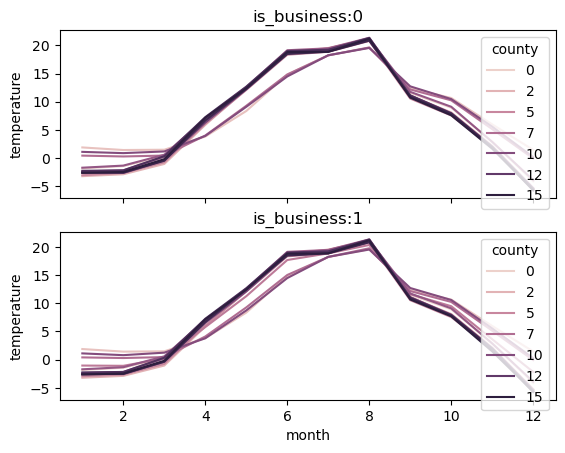

In [27]:
# 气温和地表温度与是否商业，月份，target的关系（因为气温和地表温度相似度极高，所以用温度替代）
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=merged_is_consumption_month.loc[i], x='month', y='temperature',hue='county',ax=ax)
    ax.set_title('is_business:'+str(i))

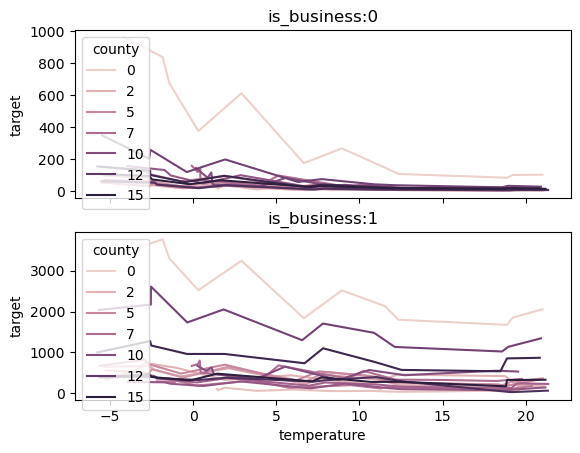

In [28]:
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=merged_is_consumption_month.loc[i], x='temperature', y='target',hue='county',ax=ax)
    ax.set_title('is_business:'+str(i))

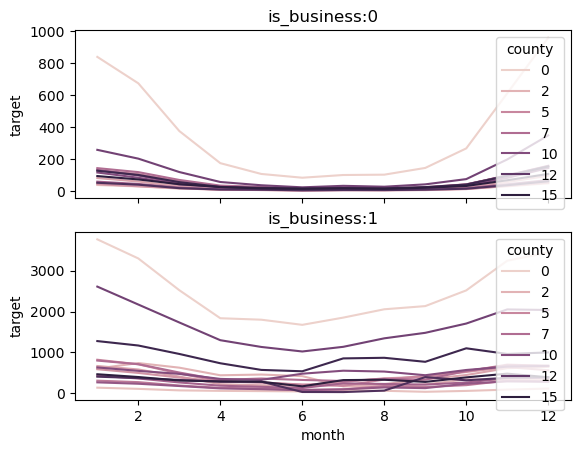

In [29]:
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=merged_is_consumption_month.loc[i], x='month', y='target',hue='county',ax=ax)
    ax.set_title('is_business:'+str(i))

In [30]:
merged_no_consumption_month  = merged_no_consumption.groupby(['is_business','month','county']).mean()
merged_no_consumption_month
merged_no_consumption_month_corr = merged_no_consumption_month[['target','temperature']]
merged_no_consumption_month_corr.corr()

,target,temperature
target,1.000000,0.435265
temperature,0.435265,1.000000


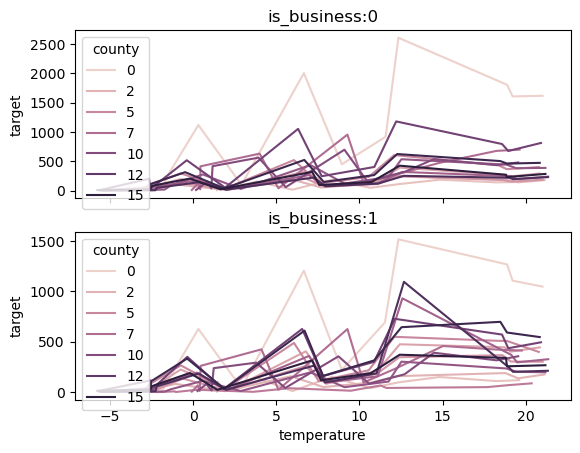

In [31]:
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=merged_no_consumption_month.loc[i], x='temperature', y='target',hue='county',ax=ax)
    ax.set_title('is_business:'+str(i))

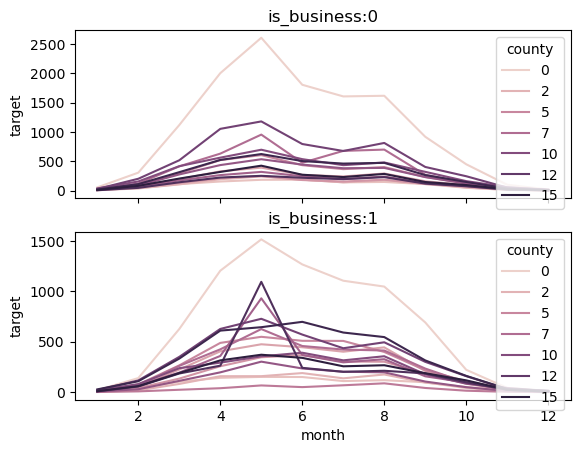

In [32]:
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=merged_no_consumption_month.loc[i], x='month', y='target',hue='county',ax=ax)
    ax.set_title('is_business:'+str(i))

由此可见生产目标和温度的相关性较大，消耗量与温度相关性较低，但消耗量为正相关

接下来测试降雨量,相似度极低,但不知道为什么生产量相似度依旧较高



In [33]:
merged_is_consumption_month_rain_corr = merged_is_consumption_month[['target','rain']]
merged_is_consumption_month_rain_corr.corr()

,target,rain
target,1.000000,-0.133839
rain,-0.133839,1.000000


In [34]:
merged_no_consumption_month_rain_corr = merged_no_consumption_month[['target','rain']]
merged_no_consumption_month_rain_corr.corr()

,target,rain
target,1.000000,0.242346
rain,0.242346,1.000000


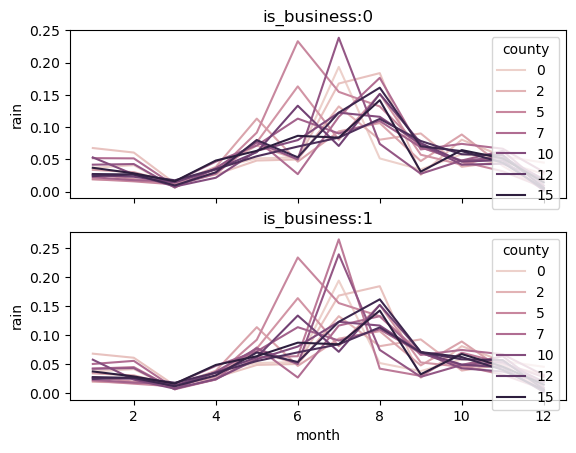

In [35]:
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=merged_is_consumption_month_rain_corr.loc[i], x='month', y='rain',hue='county',ax=ax)
    ax.set_title('is_business:'+str(i))

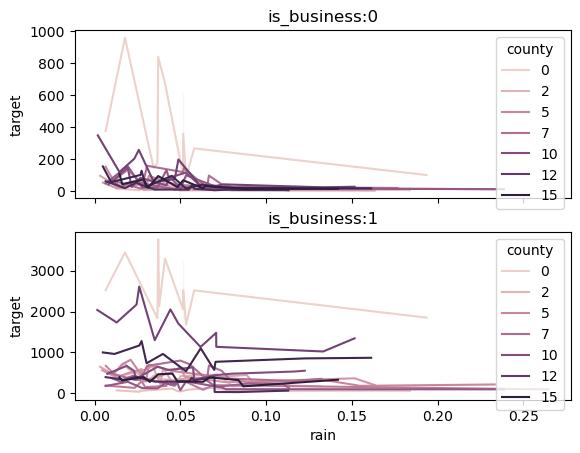

In [36]:
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=merged_is_consumption_month_rain_corr.loc[i], x='rain', y='target',hue='county',ax=ax)
    ax.set_title('is_business:'+str(i))

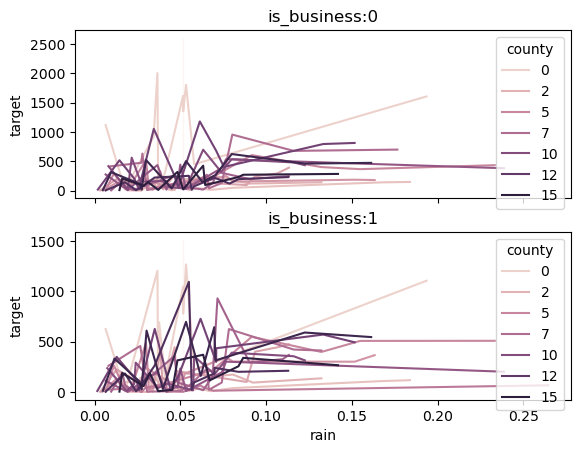

In [37]:
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=merged_no_consumption_month_rain_corr.loc[i], x='rain', y='target',hue='county',ax=ax)
    ax.set_title('is_business:'+str(i))

In [38]:
def xiangguan(index):
    return index+'生产的相关性为:{}'.format(merged_no_consumption_month[['target',index]].corr()),index+'消耗的相关性为:{}'.format(merged_is_consumption_month[['target',index]].corr())

In [39]:
xiangguan(index='snowfall')

('snowfall生产的相关性为:            target  snowfall\ntarget    1.000000 -0.435188\nsnowfall -0.435188  1.000000',
 'snowfall消耗的相关性为:            target  snowfall\ntarget    1.000000  0.155367\nsnowfall  0.155367  1.000000')

In [40]:
def picture_no_consumption(x,y):
    figure, axes = plt.subplots(2, 1, sharex=True)
    for i, ax in enumerate(axes.ravel()):
        sns.lineplot(data=merged_no_consumption_month.loc[i], x=x, y=y,hue='county',ax=ax)
        ax.set_title('is_business:'+str(i))
def picture_is_consumption(x,y):
    figure, axes = plt.subplots(2, 1, sharex=True)
    for i, ax in enumerate(axes.ravel()):
        sns.lineplot(data=merged_is_consumption_month.loc[i], x=x, y=y,hue='county',ax=ax)
        ax.set_title('is_business:'+str(i))

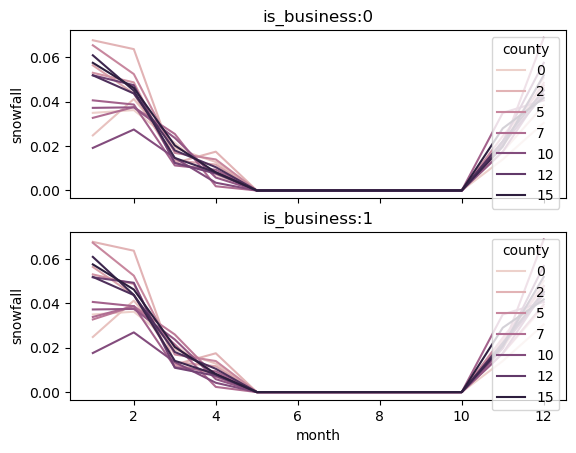

In [41]:
picture_no_consumption(x='month',y='snowfall')

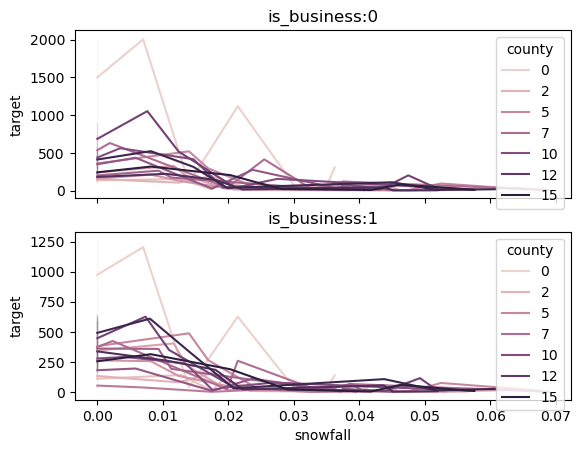

In [42]:
picture_no_consumption(x='snowfall',y='target')

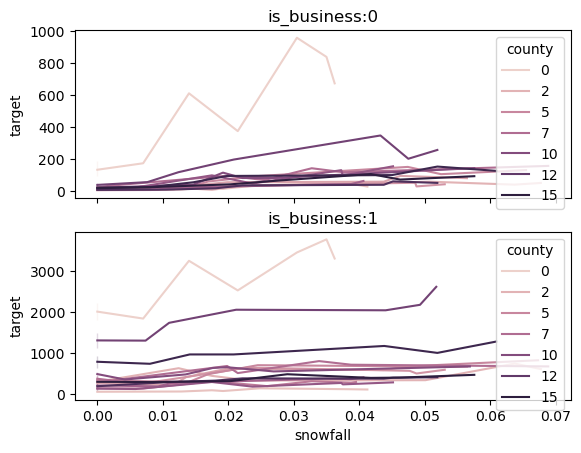

In [43]:
picture_is_consumption(x='snowfall',y='target')

In [44]:
indexs=['product_type','temperature','dewpoint','rain','snowfall','surface_pressure','cloudcover_total','cloudcover_low','cloudcover_mid','cloudcover_high','windspeed_10m','winddirection_10m','shortwave_radiation','direct_solar_radiation','diffuse_radiation']
for index in indexs:
    display(xiangguan(index))

('product_type生产的相关性为:                target  product_type\ntarget        1.000000     -0.153013\nproduct_type -0.153013      1.000000',
 'product_type消耗的相关性为:                target  product_type\ntarget        1.000000     -0.342523\nproduct_type -0.342523      1.000000')

('temperature生产的相关性为:               target  temperature\ntarget       1.000000     0.435265\ntemperature  0.435265     1.000000',
 'temperature消耗的相关性为:               target  temperature\ntarget       1.000000    -0.184035\ntemperature -0.184035     1.000000')

('dewpoint生产的相关性为:            target  dewpoint\ntarget    1.000000  0.331578\ndewpoint  0.331578  1.000000',
 'dewpoint消耗的相关性为:            target  dewpoint\ntarget    1.000000 -0.169966\ndewpoint -0.169966  1.000000')

('rain生产的相关性为:          target      rain\ntarget  1.000000  0.242346\nrain    0.242346  1.000000',
 'rain消耗的相关性为:          target      rain\ntarget  1.000000 -0.133839\nrain   -0.133839  1.000000')

('snowfall生产的相关性为:            target  snowfall\ntarget    1.000000 -0.435188\nsnowfall -0.435188  1.000000',
 'snowfall消耗的相关性为:            target  snowfall\ntarget    1.000000  0.155367\nsnowfall  0.155367  1.000000')

('surface_pressure生产的相关性为:                    target  surface_pressure\ntarget            1.000000          0.203722\nsurface_pressure  0.203722          1.000000',
 'surface_pressure消耗的相关性为:                    target  surface_pressure\ntarget            1.000000         -0.183004\nsurface_pressure -0.183004          1.000000')

('cloudcover_total生产的相关性为:                    target  cloudcover_total\ntarget            1.000000         -0.555908\ncloudcover_total -0.555908          1.000000',
 'cloudcover_total消耗的相关性为:                    target  cloudcover_total\ntarget            1.000000          0.182008\ncloudcover_total  0.182008          1.000000')

('cloudcover_low生产的相关性为:                  target  cloudcover_low\ntarget          1.000000       -0.564447\ncloudcover_low -0.564447        1.000000',
 'cloudcover_low消耗的相关性为:                  target  cloudcover_low\ntarget          1.000000        0.184922\ncloudcover_low  0.184922        1.000000')

('cloudcover_mid生产的相关性为:                  target  cloudcover_mid\ntarget          1.000000       -0.396197\ncloudcover_mid -0.396197        1.000000',
 'cloudcover_mid消耗的相关性为:                  target  cloudcover_mid\ntarget          1.000000        0.155722\ncloudcover_mid  0.155722        1.000000')

('cloudcover_high生产的相关性为:                  target  cloudcover_high\ntarget           1.00000         -0.23954\ncloudcover_high -0.23954          1.00000',
 'cloudcover_high消耗的相关性为:                   target  cloudcover_high\ntarget           1.000000         0.088001\ncloudcover_high  0.088001         1.000000')

('windspeed_10m生产的相关性为:                 target  windspeed_10m\ntarget         1.000000      -0.267807\nwindspeed_10m -0.267807       1.000000',
 'windspeed_10m消耗的相关性为:                 target  windspeed_10m\ntarget         1.000000      -0.044868\nwindspeed_10m -0.044868       1.000000')

('winddirection_10m生产的相关性为:                     target  winddirection_10m\ntarget             1.000000          -0.179082\nwinddirection_10m -0.179082           1.000000',
 'winddirection_10m消耗的相关性为:                    target  winddirection_10m\ntarget             1.00000            0.07799\nwinddirection_10m  0.07799            1.00000')

('shortwave_radiation生产的相关性为:                       target  shortwave_radiation\ntarget               1.000000             0.585979\nshortwave_radiation  0.585979             1.000000',
 'shortwave_radiation消耗的相关性为:                       target  shortwave_radiation\ntarget               1.000000            -0.199497\nshortwave_radiation -0.199497             1.000000')

('direct_solar_radiation生产的相关性为:                          target  direct_solar_radiation\ntarget                  1.000000                0.586064\ndirect_solar_radiation  0.586064                1.000000',
 'direct_solar_radiation消耗的相关性为:                          target  direct_solar_radiation\ntarget                  1.000000               -0.192784\ndirect_solar_radiation -0.192784                1.000000')

('diffuse_radiation生产的相关性为:                     target  diffuse_radiation\ntarget             1.000000           0.557404\ndiffuse_radiation  0.557404           1.000000',
 'diffuse_radiation消耗的相关性为:                     target  diffuse_radiation\ntarget             1.000000          -0.207017\ndiffuse_radiation -0.207017           1.000000')

In [45]:
merged_no_consumption_month.corr().loc['target']

data_block_id             0.321427
target                    1.000000
is_consumption                 NaN
product_type             -0.153013
hour                      0.019029
datetime                  0.321432
temperature               0.435265
dewpoint                  0.331578
rain                      0.242346
snowfall                 -0.435188
surface_pressure          0.203722
cloudcover_total         -0.555908
cloudcover_low           -0.564447
cloudcover_mid           -0.396197
cloudcover_high          -0.239540
windspeed_10m            -0.267807
winddirection_10m        -0.179082
shortwave_radiation       0.585979
direct_solar_radiation    0.586064
diffuse_radiation         0.557404
latitude                  0.075837
longitude                -0.058836
year                      0.226158
day                       0.005537
Name: target, dtype: float64

In [46]:
merged_is_consumption_month.corr().loc['target']

data_block_id            -0.030518
target                    1.000000
is_consumption                 NaN
product_type             -0.342523
hour                      0.042360
datetime                 -0.030520
temperature              -0.184035
dewpoint                 -0.169966
rain                     -0.133839
snowfall                  0.155367
surface_pressure         -0.183004
cloudcover_total          0.182008
cloudcover_low            0.184922
cloudcover_mid            0.155722
cloudcover_high           0.088001
windspeed_10m            -0.044868
winddirection_10m         0.077990
shortwave_radiation      -0.199497
direct_solar_radiation   -0.192784
diffuse_radiation        -0.207017
latitude                  0.121983
longitude                -0.013952
year                     -0.007069
day                       0.004585
Name: target, dtype: float64

## 由以上两个相关性可知：
### 与生产相关性高的有时间，温度，降雪，云层覆盖度，太阳辐射，较高的有降雨，地表压强，风速；
### 与消耗相关性较高的有产品类型；

# 预测天气部分

In [47]:
# 读取数据
forcast_weather = pd.read_csv('../data/forecast_weather.csv', parse_dates=['forecast_datetime'])
forcast_weather

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 00:00:00+00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 00:00:00+00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 00:00:00+00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 00:00:00+00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 00:00:00+00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424507,59.7,26.2,2023-05-30 00:00:00+00:00,48,10.150049,5.662744,0.061066,0.257339,0.004059,0.308594,6.890626,-3.258144,637,2023-06-01 00:00:00+00:00,0.0,0.0,0.0,0.0
3424508,59.7,26.7,2023-05-30 00:00:00+00:00,48,10.259790,5.922754,0.107880,0.895203,0.198700,0.906036,6.890626,-3.768032,637,2023-06-01 00:00:00+00:00,0.0,0.0,0.0,0.0
3424509,59.7,27.2,2023-05-30 00:00:00+00:00,48,10.467798,6.072534,0.000000,0.387466,0.448853,0.530518,6.214112,-4.700405,637,2023-06-01 00:00:00+00:00,0.0,0.0,0.0,0.0
3424510,59.7,27.7,2023-05-30 00:00:00+00:00,48,10.694116,7.009058,0.000000,0.505936,0.997314,0.997498,5.810060,-4.338345,637,2023-06-01 00:00:00+00:00,0.0,0.0,0.0,0.0


In [49]:
# 将经纬度乘以10并调整为整数型以减少内存占用
forcast_weather['latitude'] = forcast_weather['latitude']*10
forcast_weather['longitude'] = forcast_weather['longitude']*10
forcast_weather['latitude'] = forcast_weather['latitude'].astype(int)
forcast_weather['longitude'] = forcast_weather['longitude'].astype(int)
forcast_weather['hour'] = forcast_weather['forecast_datetime'].apply(lambda x: x.hour)
forcast_weather.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation,hour
0,576,217,2021-09-01 00:00:00+00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0,1
1,576,222,2021-09-01 00:00:00+00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0,1
2,576,227,2021-09-01 00:00:00+00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0,1
3,576,232,2021-09-01 00:00:00+00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0,1
4,576,237,2021-09-01 00:00:00+00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0,1


In [50]:
# 拼接前的预测天气数据
len(forcast_weather)

3424512

In [51]:
# 筛选hours_ahead小于24的数据，即预测跨度为一天的数据
forcast_weather = forcast_weather[forcast_weather['hours_ahead'] >= 24]
len(forcast_weather)

1783600

In [52]:
# 对数据按照经纬度拼接
forcast_weather = pd.merge(left=forcast_weather, right=location, on=['latitude', 'longitude'])
# forcast_weather.drop_duplicates(subset=['county', 'origin_datetime'], inplace=True)
forcast_weather['county'].unique()
# 经过观察拼接后的county缺少了12

array([10, 15,  7, 13, 14, 11,  8,  4,  1,  6,  9,  3,  0,  5,  2],
      dtype=int64)

In [53]:
train_with_forecast_weather = pd.merge(left=train, right=forcast_weather, on=['county', 'data_block_id', 'hour'], how='left')
train_with_forecast_weather.drop_duplicates(subset=['row_id'], inplace=True)
train_with_forecast_weather

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,month,day,hour,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021,9,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021,9,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021,9,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021,9,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021,9,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11263779,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,2023,5,31,23,576.0,267.0,2023-05-30 00:00:00+00:00,47.0,9.185205,4.397241,0.570526,0.0,0.0,0.570526,3.161763,-0.698455,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0
11263784,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,2023,5,31,23,576.0,267.0,2023-05-30 00:00:00+00:00,47.0,9.185205,4.397241,0.570526,0.0,0.0,0.570526,3.161763,-0.698455,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0
11263789,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,2023,5,31,23,576.0,267.0,2023-05-30 00:00:00+00:00,47.0,9.185205,4.397241,0.570526,0.0,0.0,0.570526,3.161763,-0.698455,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0
11263794,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,2023,5,31,23,576.0,267.0,2023-05-30 00:00:00+00:00,47.0,9.185205,4.397241,0.570526,0.0,0.0,0.570526,3.161763,-0.698455,2023-05-31 23:00:00+00:00,0.0,0.0,0.0,0.0


In [54]:
len(train)

2018352

In [55]:
len(train_with_forecast_weather)

2018352

In [56]:
# 查看拼接后数据的缺失值情况
train_with_forecast_weather.isnull().sum()

county                                   0
is_business                              0
product_type                             0
target                                 528
is_consumption                           0
datetime                                 0
data_block_id                            0
row_id                                   0
prediction_unit_id                       0
year                                     0
month                                    0
day                                      0
hour                                     0
latitude                             33504
longitude                            33504
origin_datetime                      33504
hours_ahead                          33504
temperature                          33504
dewpoint                             33504
cloudcover_high                      33504
cloudcover_low                       33504
cloudcover_mid                       33504
cloudcover_total                     33504
10_metre_u_

In [57]:
# 删除缺失值
train_with_forecast_weather.dropna(how='any', inplace=True)
train_with_forecast_weather.drop(columns=['forecast_datetime', 'origin_datetime'], inplace=True)

## 生产电量与预测天气的相关性
以county=2, product_type=1为例

### 商业生产电量与预测天气的相关性

In [74]:
train_forecast_is_consumption  = train_with_forecast_weather[(train_with_forecast_weather['is_consumption']==0) & 
                                                             (train_with_forecast_weather['county']==2) & 
                                                             (train_with_forecast_weather['product_type'] == 1) & 
                                                             (train_with_forecast_weather['is_business'] == 1)]
corr_no_consumption_is_business = train_forecast_is_consumption.corr()['target']
corr_no_consumption_is_business

county                                    NaN
is_business                               NaN
product_type                              NaN
target                               1.000000
is_consumption                            NaN
datetime                             0.024407
data_block_id                        0.024219
row_id                               0.023588
prediction_unit_id                        NaN
year                                -0.003156
month                                0.040172
day                                  0.022450
hour                                 0.097135
latitude                                  NaN
longitude                                 NaN
hours_ahead                          0.097135
temperature                          0.528462
dewpoint                             0.268787
cloudcover_high                     -0.097232
cloudcover_low                      -0.307835
cloudcover_mid                      -0.133898
cloudcover_total                  

### 非商业生产电量与预测天气的相关性

In [75]:
train_forecast_is_consumption  = train_with_forecast_weather[(train_with_forecast_weather['is_consumption']==0) & 
                                                             (train_with_forecast_weather['county']==2) & 
                                                             (train_with_forecast_weather['product_type'] == 1) & 
                                                             (train_with_forecast_weather['is_business'] == 0)]
corr_no_consumption_no_business = train_forecast_is_consumption.corr()['target']
corr_no_consumption_is_business

county                                    NaN
is_business                               NaN
product_type                              NaN
target                               1.000000
is_consumption                            NaN
datetime                             0.024407
data_block_id                        0.024219
row_id                               0.023588
prediction_unit_id                        NaN
year                                -0.003156
month                                0.040172
day                                  0.022450
hour                                 0.097135
latitude                                  NaN
longitude                                 NaN
hours_ahead                          0.097135
temperature                          0.528462
dewpoint                             0.268787
cloudcover_high                     -0.097232
cloudcover_low                      -0.307835
cloudcover_mid                      -0.133898
cloudcover_total                  

## 消费电量与预测天气的相关性

### 商业消费电量与预测天气的相关性

In [79]:
train_forecast_is_consumption  = train_with_forecast_weather[(train_with_forecast_weather['is_consumption']==1) & 
                                                             (train_with_forecast_weather['county']==2) & 
                                                             (train_with_forecast_weather['product_type'] == 1) & 
                                                             (train_with_forecast_weather['is_business'] == 1)]
corr_is_consumption_is_business = train_forecast_is_consumption.corr()['target']
corr_is_consumption_is_business

county                                    NaN
is_business                               NaN
product_type                              NaN
target                               1.000000
is_consumption                            NaN
datetime                             0.187615
data_block_id                        0.187504
row_id                               0.188059
prediction_unit_id                        NaN
year                                 0.199295
month                               -0.044960
day                                 -0.060847
hour                                 0.057416
latitude                                  NaN
longitude                                 NaN
hours_ahead                          0.057416
temperature                         -0.397307
dewpoint                            -0.429379
cloudcover_high                      0.011089
cloudcover_low                       0.150954
cloudcover_mid                       0.104484
cloudcover_total                  

### 非商业消费电量与预测天气的相关性

In [67]:
train_forecast_is_consumption  = train_with_forecast_weather[(train_with_forecast_weather['is_consumption']==1) & 
                                                             (train_with_forecast_weather['county']==2) & 
                                                             (train_with_forecast_weather['product_type'] == 1) & 
                                                             (train_with_forecast_weather['is_business'] == 0)]
corr_is_consumption_no_business = train_forecast_is_consumption.corr()['target']
corr_is_consumption_no_business

county                                    NaN
is_business                               NaN
product_type                              NaN
target                               1.000000
is_consumption                            NaN
datetime                             0.518004
data_block_id                        0.517886
row_id                               0.519506
prediction_unit_id                        NaN
year                                 0.472839
month                               -0.146909
day                                 -0.054073
hour                                 0.071991
latitude                                  NaN
longitude                                 NaN
hours_ahead                          0.071991
temperature                         -0.594492
dewpoint                            -0.517949
cloudcover_high                      0.077881
cloudcover_low                       0.315915
cloudcover_mid                       0.154951
cloudcover_total                  

<Axes: >

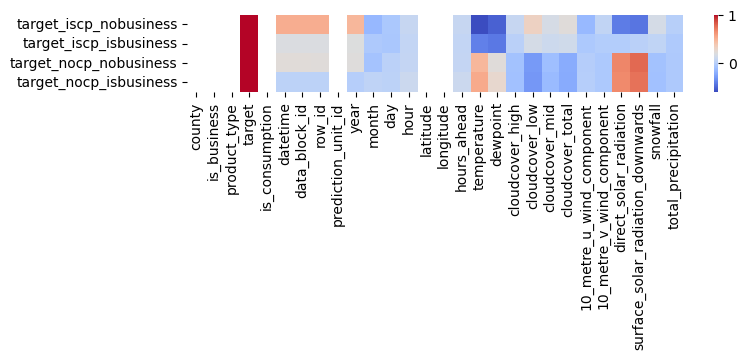

In [88]:
plt.figure(figsize=(8,1))
corr_is_consumption_no_business.rename('target_iscp_nobusiness', inplace=True)
corr_is_consumption_is_business.rename('target_iscp_isbusiness', inplace=True)
corr_no_consumption_no_business.rename('target_nocp_nobusiness', inplace=True)
corr_no_consumption_is_business.rename('target_nocp_isbusiness', inplace=True)
corr_data = pd.concat([corr_is_consumption_no_business, corr_is_consumption_is_business, corr_no_consumption_no_business, 
                       corr_no_consumption_is_business], axis=1)
sns.heatmap(corr_data.T, cmap='coolwarm')

## 总结
1、与生产电量相关性比较高的变量：**低相关**：dewpoint、cloudcover_low、cloudcover_total；**高相关**：direct_solar_radiation、surface_solar_radiation_downwards、temperature
2、与消费电量相关性比较高的变量：在商业消费用电中，dewpoint、temperature中度相关，在非商业消费用电中，temperature、dewpoint、direct_solar_radiation、surface_solar_radiation_downwards中度相关，cloudcover_low、cloudcover_total低度相关